In [9]:
# import dependencies
import requests
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# connect to API key
ckey = "c3c7837f76a061a6b169ca1e0b35db71ba2b26c3"

In [10]:
# read zip codes csv
zipcodes_data = "clean_nyc_zips.csv" 
zipcodes_df = pd.read_csv(zipcodes_data)
zipcodes_df.head()

,NYC_Zip_Codes
0,10001
1,10002
2,10003
3,10004
4,10005


In [11]:
# Add columns for income
zipcodes_df["Avg Income ($)"] = ""


zipcodes_df.head()

,NYC_Zip_Codes,Avg Income ($)
0,10001,
1,10002,
2,10003,
3,10004,
4,10005,


In [12]:
#Pull income data by using US census API
base_url = "https://api.census.gov/data/2017/acs/acs5/profile"

avg_income = "DP03_0063E"   

for index, row in zipcodes_df.iterrows():    
    
    zip = row['NYC_Zip_Codes']
    
    query_url = f"{base_url}?get={avg_income},NAME&for=zip%20code%20tabulation%20area:{zip}&key={ckey}"
    
    try:
        response = requests.get(query_url).json()
        pprint(response)
        print(f"Finding demo data for zip code: {zip}")
        
        zipcodes_df.loc[index, "Avg Income ($)"] = response[1][0]
        
        
    
    except json.decoder.JSONDecodeError:
        print("Missing field/result... skipping.")
        
    print("-------------------------------------------")

[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['161227', 'ZCTA5 10001', '10001']]
Finding demo data for zip code: 10001
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['65718', 'ZCTA5 10002', '10002']]
Finding demo data for zip code: 10002
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['182531', 'ZCTA5 10003', '10003']]
Finding demo data for zip code: 10003
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['191760', 'ZCTA5 10004', '10004']]
Finding demo data for zip code: 10004
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['201734', 'ZCTA5 10005', '10005']]
Finding demo data for zip code: 10005
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['196771', 'ZCTA5 10006', '10006']]
Finding demo data for zip code: 10006
-------------

[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['96994', 'ZCTA5 10306', '10306']]
Finding demo data for zip code: 10306
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['113591', 'ZCTA5 10307', '10307']]
Finding demo data for zip code: 10307
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['104614', 'ZCTA5 10308', '10308']]
Finding demo data for zip code: 10308
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['118300', 'ZCTA5 10309', '10309']]
Finding demo data for zip code: 10309
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['87497', 'ZCTA5 10310', '10310']]
Finding demo data for zip code: 10310
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['108766', 'ZCTA5 10312', '10312']]
Finding demo data for zip code: 10312
--------------

[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['84919', 'ZCTA5 11210', '11210']]
Finding demo data for zip code: 11210
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['100706', 'ZCTA5 11211', '11211']]
Finding demo data for zip code: 11211
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['42285', 'ZCTA5 11212', '11212']]
Finding demo data for zip code: 11212
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['56798', 'ZCTA5 11213', '11213']]
Finding demo data for zip code: 11213
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['73599', 'ZCTA5 11214', '11214']]
Finding demo data for zip code: 11214
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['162894', 'ZCTA5 11215', '11215']]
Finding demo data for zip code: 11215
----------------

[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['69474', 'ZCTA5 11377', '11377']]
Finding demo data for zip code: 11377
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['86987', 'ZCTA5 11378', '11378']]
Finding demo data for zip code: 11378
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['95587', 'ZCTA5 11379', '11379']]
Finding demo data for zip code: 11379
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['78239', 'ZCTA5 11385', '11385']]
Finding demo data for zip code: 11385
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['101581', 'ZCTA5 11411', '11411']]
Finding demo data for zip code: 11411
-------------------------------------------
[['DP03_0063E', 'NAME', 'zip code tabulation area'],
 ['89346', 'ZCTA5 11412', '11412']]
Finding demo data for zip code: 11412
-----------------

In [14]:
# output data frame with info added in new columns
#print(len(zipcodes_df))
zipcodes_df.head(10)



,NYC_Zip_Codes,Avg Income ($)
0,10001,161227
1,10002,65718
2,10003,182531
3,10004,191760
4,10005,201734
5,10006,196771
6,10007,376573
7,10009,90253
8,10010,177950
9,10011,197050


In [22]:
zipcodes_df.to_csv("zips_with_income.csv",index=False,header=True)

In [25]:
#income_zip_df = pd.read_csv("zips_with_income.csv")
fine_dine_df = pd.read_csv("mich_rests.csv")
fine_dine_df.head()

,Unnamed: 0,name,address,city,state,description,star,full_address,postal_code
0,1,Sushi Inoue,381 Lenox Ave,New York,NY,ONE STAR for this Japanese restaurant in Harlem.,1,"381 Lenox Ave, New York, NY 10027",10027
1,2,Dovetail,103 W 77th St,New York,NY,John Fraser's UWS fine dining restaurant has O...,1,"103 W 77th St, New York, NY 10024",10024
2,3,Cafe Boulud,20 E 76th St,New York,NY,Daniel Boulud's beloved Upper East Side restau...,1,"20 E 76th St, New York, NY 10021",10021
3,4,Jean-Georges,1 Central Park West,New York,NY,Jean-Georges Vongerichten's flagship restauran...,2,"1 Central Park West, New York, NY 10023",10023
4,5,Masa,10 Columbus Cir,New York,NY,Masa Takayama's pricey sushi restaurant has TH...,3,"10 Columbus Cir, New York, NY 10019",10019


In [26]:
postal_group = fine_dine_df.groupby('postal_code')

count_postal = postal_group['postal_code'].count()

count_restaurants_df = count_postal.rename_axis('NYC_Zip_Codes').reset_index(name='Michelin Counts')
count_restaurants_df.head()



,NYC_Zip_Codes,Michelin Counts
0,10001,2
1,10002,2
2,10003,7
3,10009,1
4,10010,4


In [27]:
# Merge two dataframes using an inner join
merge_table = pd.merge(zipcodes_df, count_restaurants_df, on="NYC_Zip_Codes",how = "left")
merge_table.head(20)


,NYC_Zip_Codes,Avg Income ($),Michelin Counts
0,10001,161227,2.0
1,10002,65718,2.0
2,10003,182531,7.0
3,10004,191760,NaN
4,10005,201734,NaN
5,10006,196771,NaN
6,10007,376573,NaN
7,10009,90253,1.0
8,10010,177950,4.0
9,10011,197050,7.0


NameError: name 'pltylim' is not defined

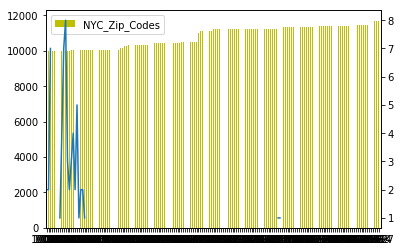

In [28]:
width = .35 # width of a bar

merge_table[['Avg Income ($)','NYC_Zip_Codes']].plot(kind='bar',color ='y',width= width)
merge_table['Michelin Counts'].plot(secondary_y = True)

ax = plt.gca()
ax.set_xticklabels(merge_table['NYC_Zip_Codes'])
tick_locations = [value for value in merge_table['NYC_Zip_Codes']]
plt.xlim(-0.5,len(merge_table['NYC_Zip_Codes']-0.25))
pltylim(0,max(merge_table['Avg Income ($)'])+0.4)

plt.show()